Some parameters : 
* criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
* splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
* max_depth(int), default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split(int or float), default=2
The minimum number of samples required to split an internal node:
    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
* min_samples_leaf(int or float), default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    * If int, then consider min_samples_leaf as the minimum number.
    * If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* max_features(int, float or {“auto”, “sqrt”, “log2”}), default=None
The number of features to consider when looking for the best split:
    * If int, then consider max_features features at each split.
    * If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
    * If “sqrt”, then max_features=sqrt(n_features).
    * If “log2”, then max_features=log2(n_features).
    * If None, then max_features=n_features.

* random_state(int), RandomState instance or None, default=None

* max_leaf_nodes(int), default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

* min_impurity_decrease(float), default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

    The weighted impurity decrease equation is the following:
    ```
    N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)
    ```
    where N is the total number of samples, 
    N_t is the number of samples at the current node, 
    N_t_L is the number of samples in the left child, 
    N_t_R is the number of samples in the right child,

In [30]:
import seaborn as sns
df = sns.load_dataset('car_crashes')

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abbrev'] = le.fit_transform(df['abbrev'])

In [22]:
y = df['total']
X = df.drop(columns='total')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(min_samples_leaf=3)
clf.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=3)

In [25]:
y_pred = clf.predict(X_test)

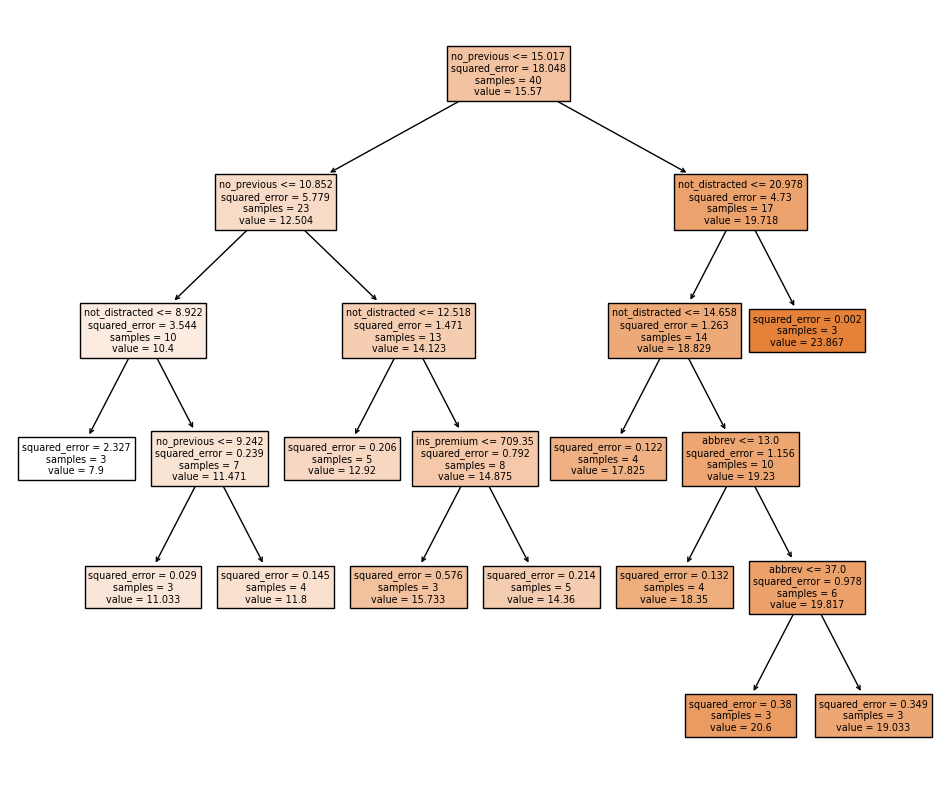

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [27]:
print("Info about tree :-\n")
print("Node count ::", clf.tree_.node_count)
print("Left children ::", clf.tree_.children_left)
print("Right children ::", clf.tree_.children_right)
print("Features ::", clf.tree_.feature)
print("Thresholds ::", clf.tree_.threshold)
print("Values ::", clf.tree_.value)

Info about tree :-

Node count :: 21
Left children :: [ 1  2  3 -1  5 -1 -1  8 -1 10 -1 -1 13 14 -1 16 -1 18 -1 -1 -1]
Right children :: [12  7  4 -1  6 -1 -1  9 -1 11 -1 -1 20 15 -1 17 -1 19 -1 -1 -1]
Features :: [ 3  3  2 -2  3 -2 -2  2 -2  4 -2 -2  2  2 -2  6 -2  6 -2 -2 -2]
Thresholds :: [ 15.0170002   10.85249996   8.92199993  -2.           9.2420001
  -2.          -2.          12.51849985  -2.         709.3500061
  -2.          -2.          20.97799969  14.65750027  -2.
  13.          -2.          37.          -2.          -2.
  -2.        ]
Values :: [[[15.57      ]]

 [[12.50434783]]

 [[10.4       ]]

 [[ 7.9       ]]

 [[11.47142857]]

 [[11.03333333]]

 [[11.8       ]]

 [[14.12307692]]

 [[12.92      ]]

 [[14.875     ]]

 [[15.73333333]]

 [[14.36      ]]

 [[19.71764706]]

 [[18.82857143]]

 [[17.825     ]]

 [[19.23      ]]

 [[18.35      ]]

 [[19.81666667]]

 [[20.6       ]]

 [[19.03333333]]

 [[23.86666667]]]


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 1.8848449494949497
Mean Absolute Error: 1.1554545454545455
R-squared: 0.8252258844305482
